<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [2]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
# Save url to a variable
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
#Import beautiful soup and requests library
import bs4
import requests

#Gives response 200 which means no error
result = requests.get(url)

In [0]:
#Parse the html from result.text and save it to the soup variable
soup = bs4.BeautifulSoup(result.text)

#Selects tag with .presentation-description and put it into a list. Strip to remove spaces and breaks
#Use ' '.join to connect the words with a space for each tag
description = [' '.join(tag.text.split()) for tag in soup.select('.presentation-description')]


In [0]:
#Import pandas
import pandas as pd

In [7]:
#Create a dataframe by using a dictionary. {'column_name': list}
df = pd.DataFrame({'description': description})
df.head()

,description
0,Have you ever wanted to write a GUI applicatio...
1,We rarely think about the dot “.” between our ...
2,Account security means making sure your users ...
3,Do you feel overwhelmed by the prospect of hav...
4,Everyone’s talking about it. Everyone’s using ...


In [8]:
#Create a new column with description character count by using the apply function on length
df['description character count'] = df['description'].apply(len)
df.head()

,description,description character count
0,Have you ever wanted to write a GUI applicatio...,760
1,We rarely think about the dot “.” between our ...,296
2,Account security means making sure your users ...,426
3,Do you feel overwhelmed by the prospect of hav...,503
4,Everyone’s talking about it. Everyone’s using ...,644


In [9]:
#Install textstat
!pip install textstat

In [10]:
#Import textstat
import textstat

#Create a new column description word count
df['description word count'] = df['description'].apply(textstat.lexicon_count)
df.head()

,description,description character count,description word count
0,Have you ever wanted to write a GUI applicatio...,760,135
1,We rarely think about the dot “.” between our ...,296,56
2,Account security means making sure your users ...,426,66
3,Do you feel overwhelmed by the prospect of hav...,503,84
4,Everyone’s talking about it. Everyone’s using ...,644,96


In [11]:
#Includes all describe summary for all features
df.describe(include='all')

#Average description word count is 130.82
#Min description word count is 20
#Max description word count is 421

,description,description character count,description word count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,Have you ever thought about what open source s...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,807.063158,130.821053
std,NaN,411.750255,64.357872
min,NaN,121.000000,20.000000
25%,NaN,538.500000,85.500000
50%,NaN,718.000000,116.000000
75%,NaN,1010.500000,165.000000


In [12]:
#Returns a df given that description character count <= 280.
df[ df['description character count'] <= 280 ]

,description,description character count,description word count
54,"Learn how to make music with Python, SuperColl...",121,20


In [13]:
#Apply fucntion flesch kincaid grade level to description and create a new column
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()

,description,description character count,description word count,description grade level
0,Have you ever wanted to write a GUI applicatio...,760,135,9.7
1,We rarely think about the dot “.” between our ...,296,56,10.7
2,Account security means making sure your users ...,426,66,8.5
3,Do you feel overwhelmed by the prospect of hav...,503,84,11.8
4,Everyone’s talking about it. Everyone’s using ...,644,96,9.5


Text(0.5, 1.0, 'Frequency of Grade Level')

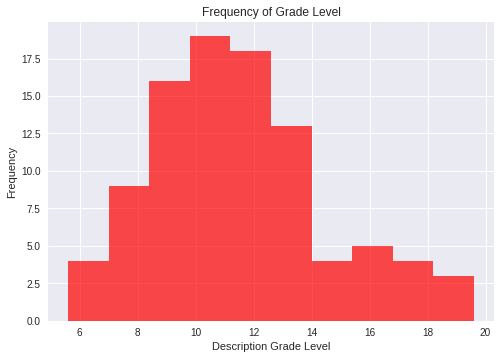

In [22]:
import matplotlib.pyplot as plt

plt.hist(df['description grade level'], color='red', alpha=.7)
plt.xlabel('Description Grade Level')
plt.ylabel('Frequency')
plt.title('Frequency of Grade Level')